# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3 - Septiembre 2024

**Rotación de Personal - IBM**

#### **Nombre y matrícula:** Oscar Luis Guadarrama Jimenez - A01796245

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [64]:
# Incluye aquí todas las librerías que consideres necesarias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler, FunctionTransformer, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,ConfusionMatrixDisplay

# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++

La rotación de personal es un fenómeno muy común en las empresas, que hace referencia a la salida voluntaria o involuntaria de los empleados. Este fenómeno puede deberse a diversos factores, como la distancia entre el lugar de trabajo y el hogar, el ingreso mensual, entre otros.

Este tema es especialmente importante para las organizaciones, ya que comprender y predecir la rotación de personal permite implementar estrategias efectivas para reducir su incidencia y minimizar los costos asociados, como la contratación, capacitación y pérdida de talento clave.

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [65]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++
df = pd.read_csv(r"E:\Tareas\IA&AA\WA_Fn-UseC_-HR-Employee-Attrition.csv")



# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

++++++++ Inicia la sección de agregar texto: ++++++++++++


Si no se utiliza el argumento include="all" en el método describe, únicamente se genera el análisis descriptivo para las variables numéricas del DataFrame. Esto significa que las variables categóricas no se incluyen en el resultado, lo cual puede limitar el entendimiento general del conjunto de datos. Al incluir include="all", también se analiza información estadística de las variables categóricas, como la cantidad de valores únicos, el valor más frecuente y su frecuencia.

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**: Se puede eliminar porque solo contiene un valor único, lo que indica que todos los trabajadores son mayores de 18 años. Esto no proporciona información útil para el análisis de datos ni para el modelo.

**b)	EmployeeCount**:Se puede eliminar porque su información es un valor único para todo el DataFrame, lo cual no aporta valor analítico ni predictivo.

**c)	StandardHours**:Se puede eliminar porque su información también es un valor único para todo el DataFrame. Al no ofrecer variabilidad, no contribuye al análisis de datos ni al modelo.

**d)	EmployeeNumber**:Se puede eliminar porque es únicamente un identificador de empleados. Este dato no tiene relevancia analítica ni predictiva.

++++++++ Termina la sección de agregar texto. +++++++++++




In [66]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

#### **NOTA: Utiliza semillas en cada función de partición, para permitir la repetibilidad de tu modelo y poder evaluarlo de mejor majera.**

In [67]:
from posixpath import split
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++

Xtrain, Xvt, ytrain, yvt = train_test_split(df.drop(columns=['Attrition']), df['Attrition'], test_size=0.3, random_state=1, stratify=df['Attrition'])
Xval, Xtest, yval, ytest = train_test_split(Xvt, yvt, test_size=0.5, random_state=1, stratify=yvt)

print("Tamaño del conjunto de entrenamiento:", Xtrain.shape)
print("Tamaño del conjunto de validación:", Xval.shape)
print("Tamaño del conjunto de prueba:", Xtest.shape)

# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Tamaño del conjunto de entrenamiento: (1029, 30)
Tamaño del conjunto de validación: (220, 30)
Tamaño del conjunto de prueba: (221, 30)


# **Ejercicio 6:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [68]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

LE = LabelEncoder()
ytrainT = pd.DataFrame(LE.fit_transform(ytrain), columns=['Attrition'])
yvalT = pd.DataFrame(LE.fit_transform(yval), columns=['Attrition'])
ytestT = pd.DataFrame(LE.fit_transform(ytest), columns=['Attrition'])

print("Proporción de datos en cada clase de entrenamiento -",ytrainT['Attrition'].value_counts() / ytrainT.shape[0])
print("Proporción de datos en cada clase de Validacion -",yvalT['Attrition'].value_counts() / yvalT.shape[0])
print("Proporción de datos en cada clase de prueba -",ytestT['Attrition'].value_counts() / ytestT.shape[0])
# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

#print(ytrainT['Porcentaje de datos en cada clase de entrenamiento - Attrition:'].value_counts() / ytrainT.shape[0])

Proporción de datos en cada clase de entrenamiento - Attrition
0    0.838678
1    0.161322
Name: count, dtype: float64
Proporción de datos en cada clase de Validacion - Attrition
0    0.840909
1    0.159091
Name: count, dtype: float64
Proporción de datos en cada clase de prueba - Attrition
0    0.837104
1    0.162896
Name: count, dtype: float64


Con base en la información obtenida, podemos indicar que existe un desbalance, dado que el 84% de los empleados pertenece a la clase "No" (no abandonaron la empresa), mientras que solo el 16% pertenece a la clase "Sí" (abandonaron la empresa). Este desbalance refleja que la rotación de personal es un evento poco frecuente dentro de la organización.


# **Ejercicio 7:**


#### **Incluye a continuación el análisis gáfico y describtivo que consideres adecuado. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

In [69]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres conveniente.

Xtrain.info()

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 1073 to 1035
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1029 non-null   int64 
 1   BusinessTravel            1029 non-null   object
 2   DailyRate                 1029 non-null   int64 
 3   Department                1029 non-null   object
 4   DistanceFromHome          1029 non-null   int64 
 5   Education                 1029 non-null   int64 
 6   EducationField            1029 non-null   object
 7   EnvironmentSatisfaction   1029 non-null   int64 
 8   Gender                    1029 non-null   object
 9   HourlyRate                1029 non-null   int64 
 10  JobInvolvement            1029 non-null   int64 
 11  JobLevel                  1029 non-null   int64 
 12  JobRole                   1029 non-null   object
 13  JobSatisfaction           1029 non-null   int64 
 14  MaritalStatus             

In [70]:
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1029.0,36.985423,9.193911,18.0,30.0,36.0,43.0,60.0
DailyRate,1029.0,802.781341,398.659239,102.0,471.0,801.0,1144.0,1496.0
DistanceFromHome,1029.0,9.252672,8.249885,1.0,2.0,7.0,15.0,29.0
Education,1029.0,2.908649,1.001659,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1029.0,2.713314,1.113425,1.0,2.0,3.0,4.0,4.0
HourlyRate,1029.0,65.751215,20.259031,30.0,48.0,66.0,83.0,100.0
JobInvolvement,1029.0,2.731778,0.724751,1.0,2.0,3.0,3.0,4.0
JobLevel,1029.0,2.070943,1.096431,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1029.0,2.756074,1.094634,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1029.0,6517.126336,4658.337026,1052.0,2936.0,4969.0,8381.0,19999.0


In [71]:
Xtrain.describe(include='object').T

,count,unique,top,freq
BusinessTravel,1029,3,Travel_Rarely,730
Department,1029,3,Research & Development,683
EducationField,1029,6,Life Sciences,421
Gender,1029,2,Male,618
JobRole,1029,9,Sales Executive,223
MaritalStatus,1029,3,Married,471
OverTime,1029,2,No,757


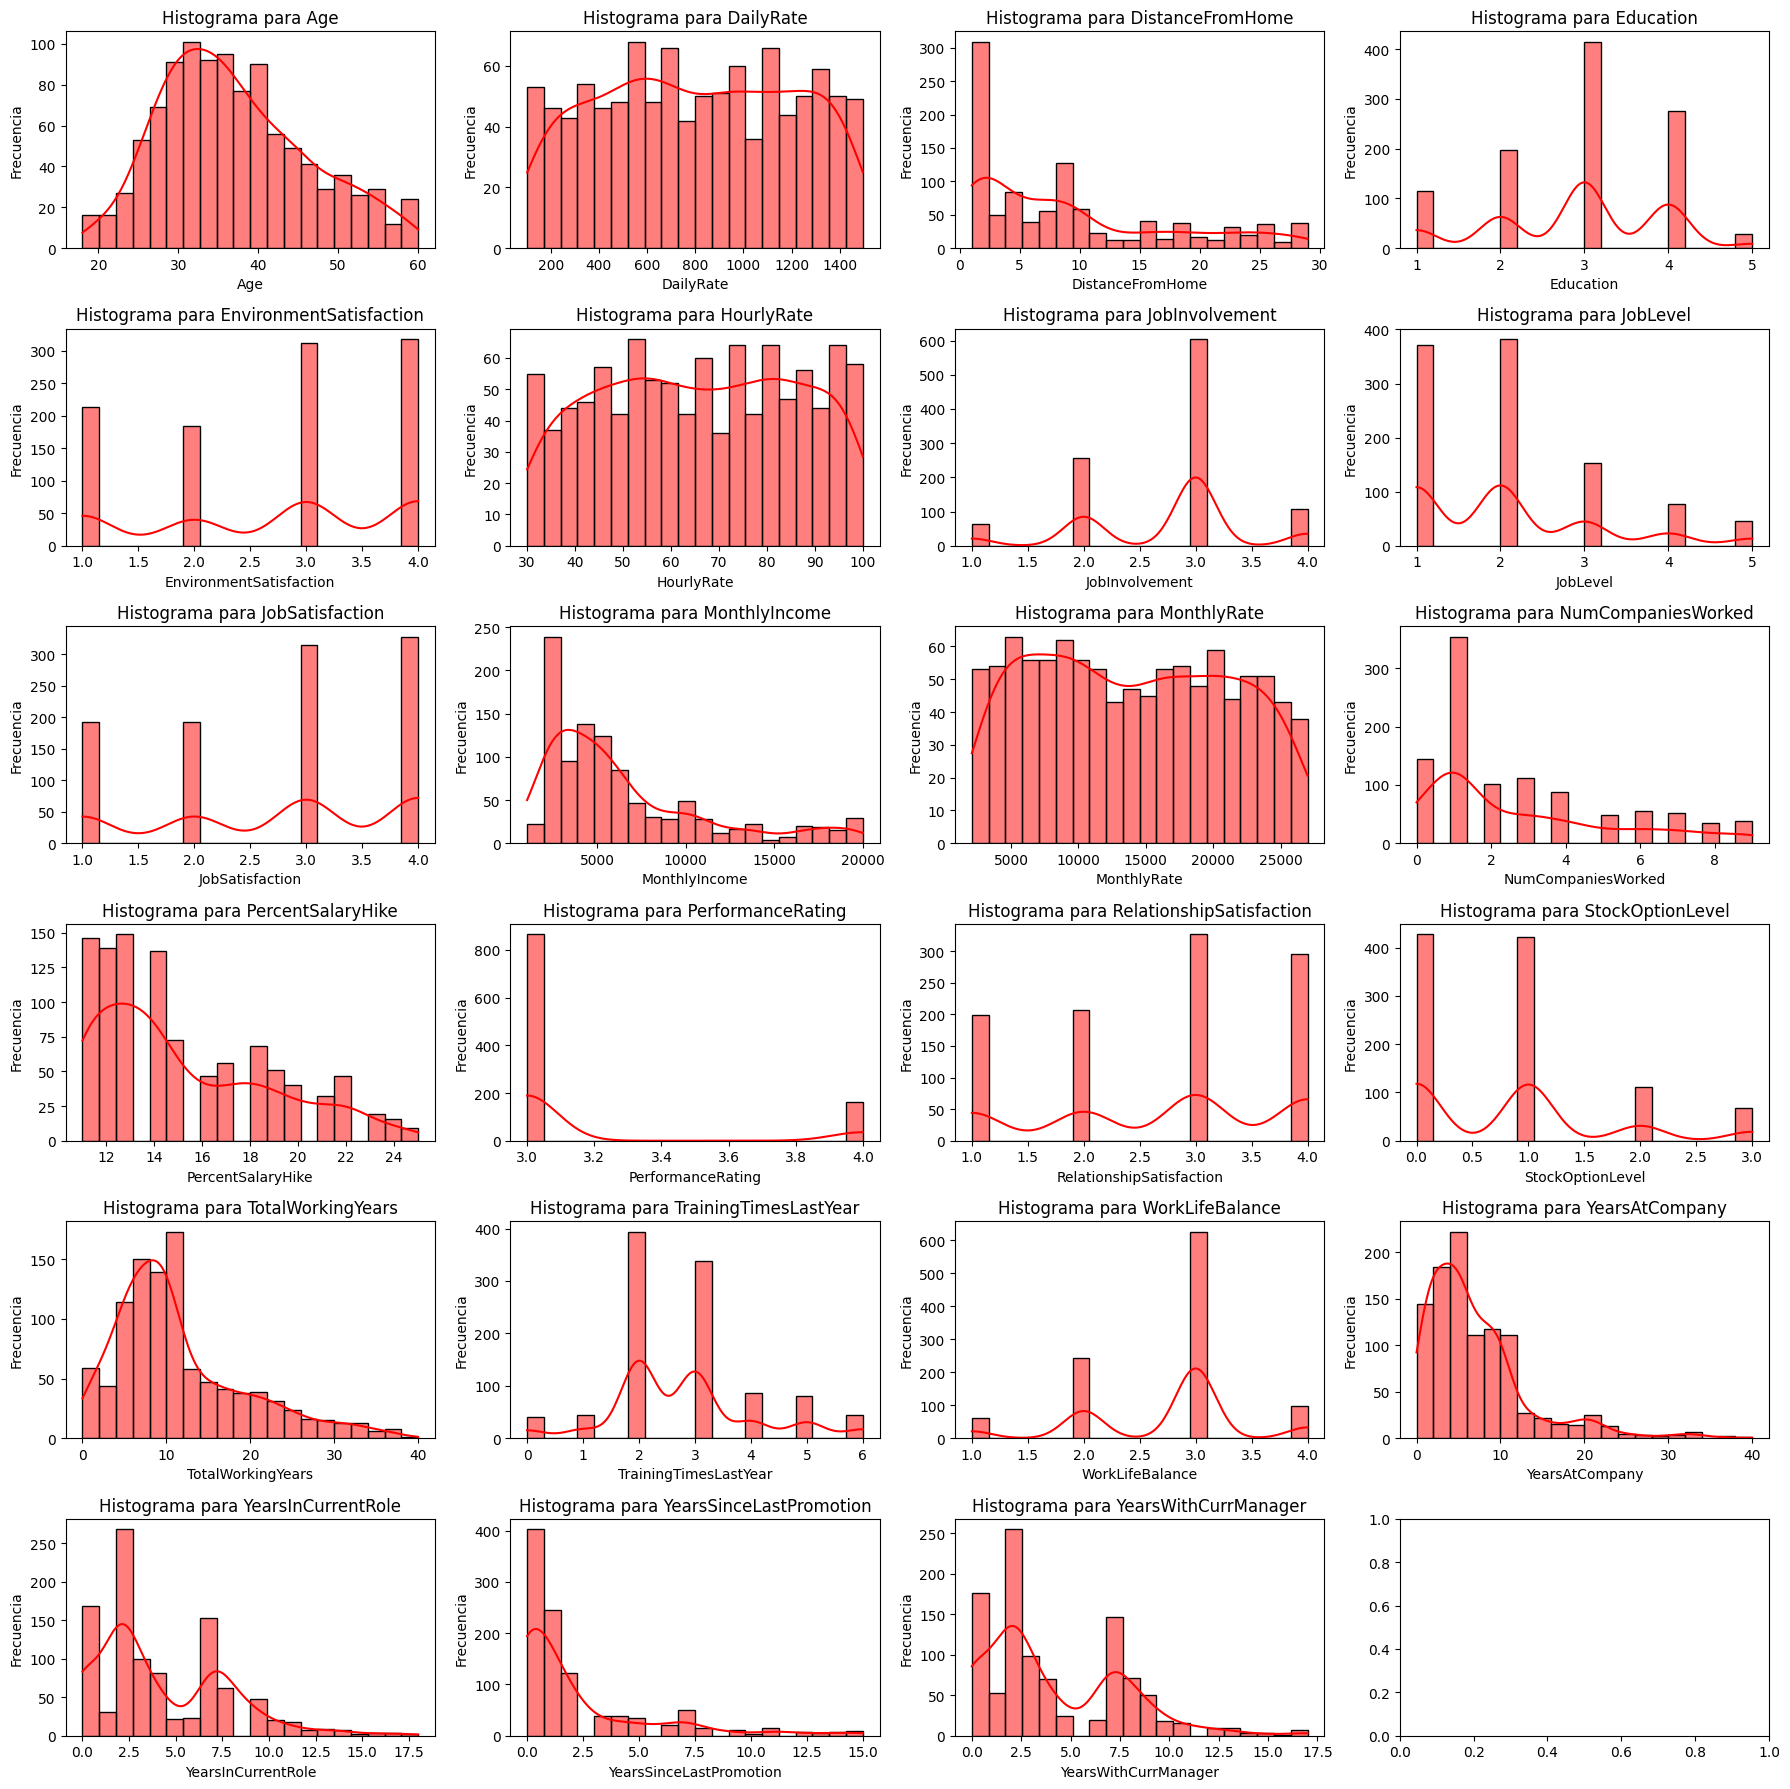

In [72]:
dfnum = Xtrain.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(6,4, figsize=(18, 18))
axes = axes.flatten()
for i, columna in enumerate(dfnum.columns):
    sns.histplot(dfnum[columna], bins=20, color = 'red', ax=axes[i], kde=True)
    axes[i].set_title(f'Histograma para {columna}')
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

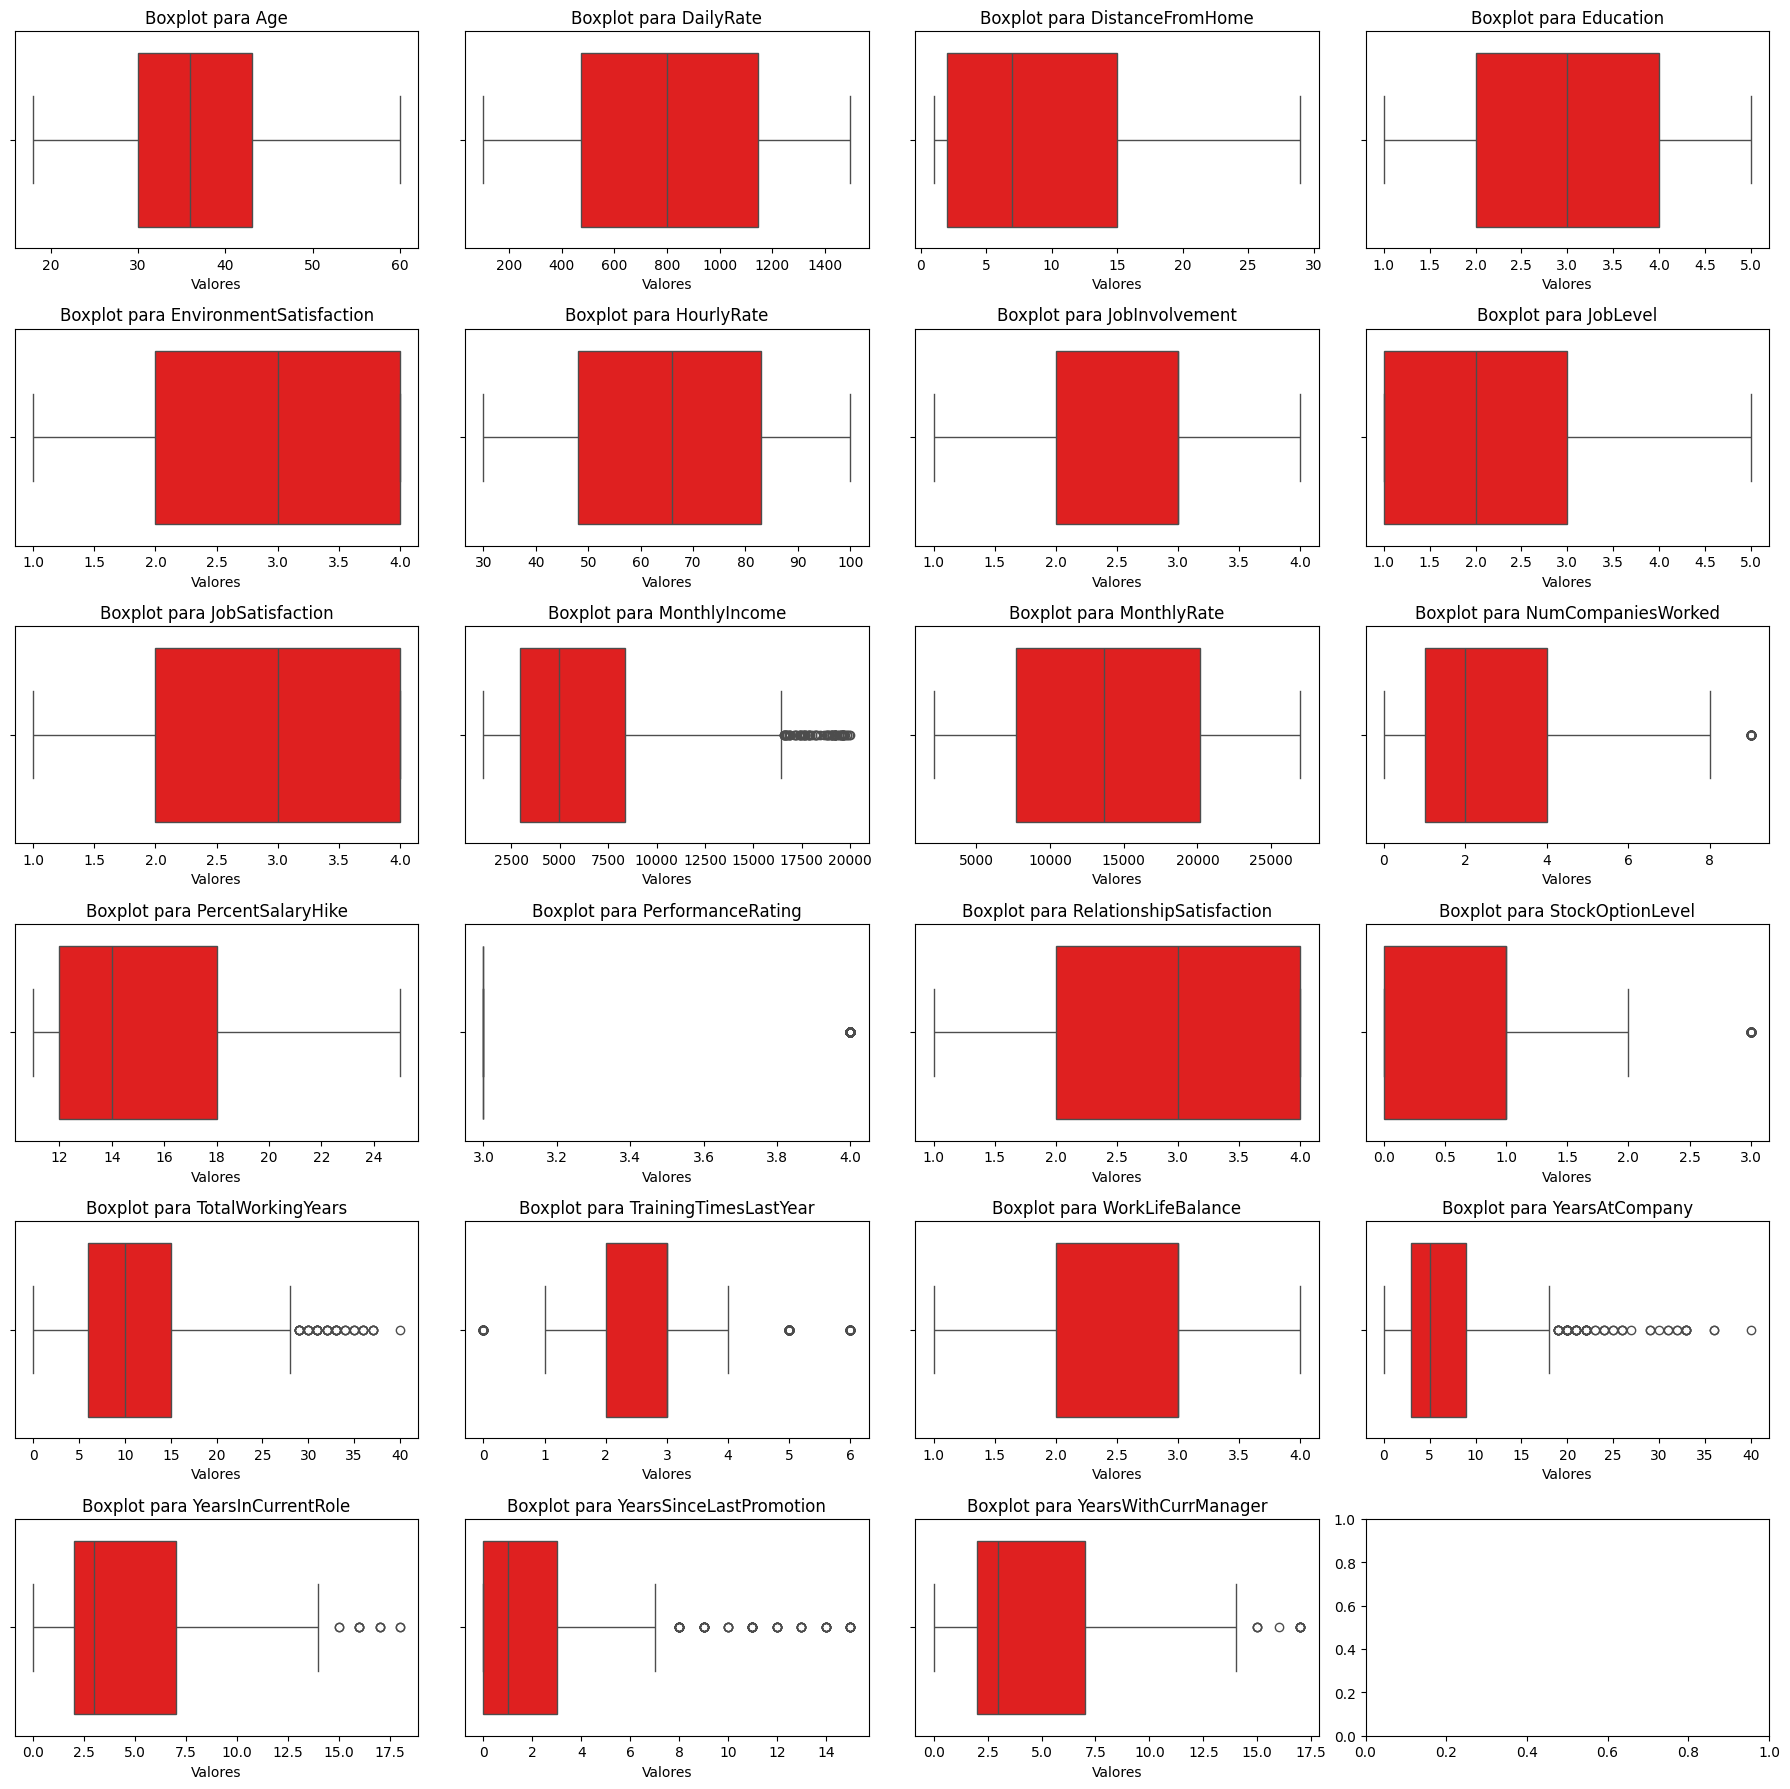

In [73]:
fig, axes = plt.subplots(6, 4, figsize=(18, 18))
axes = axes.flatten()

for i, columna in enumerate(dfnum.columns):
    sns.boxplot(data=dfnum, x=columna, ax=axes[i], color='red')
    axes[i].set_title(f'Boxplot para {columna}')
    axes[i].set_xlabel('Valores')

plt.tight_layout()
plt.show()

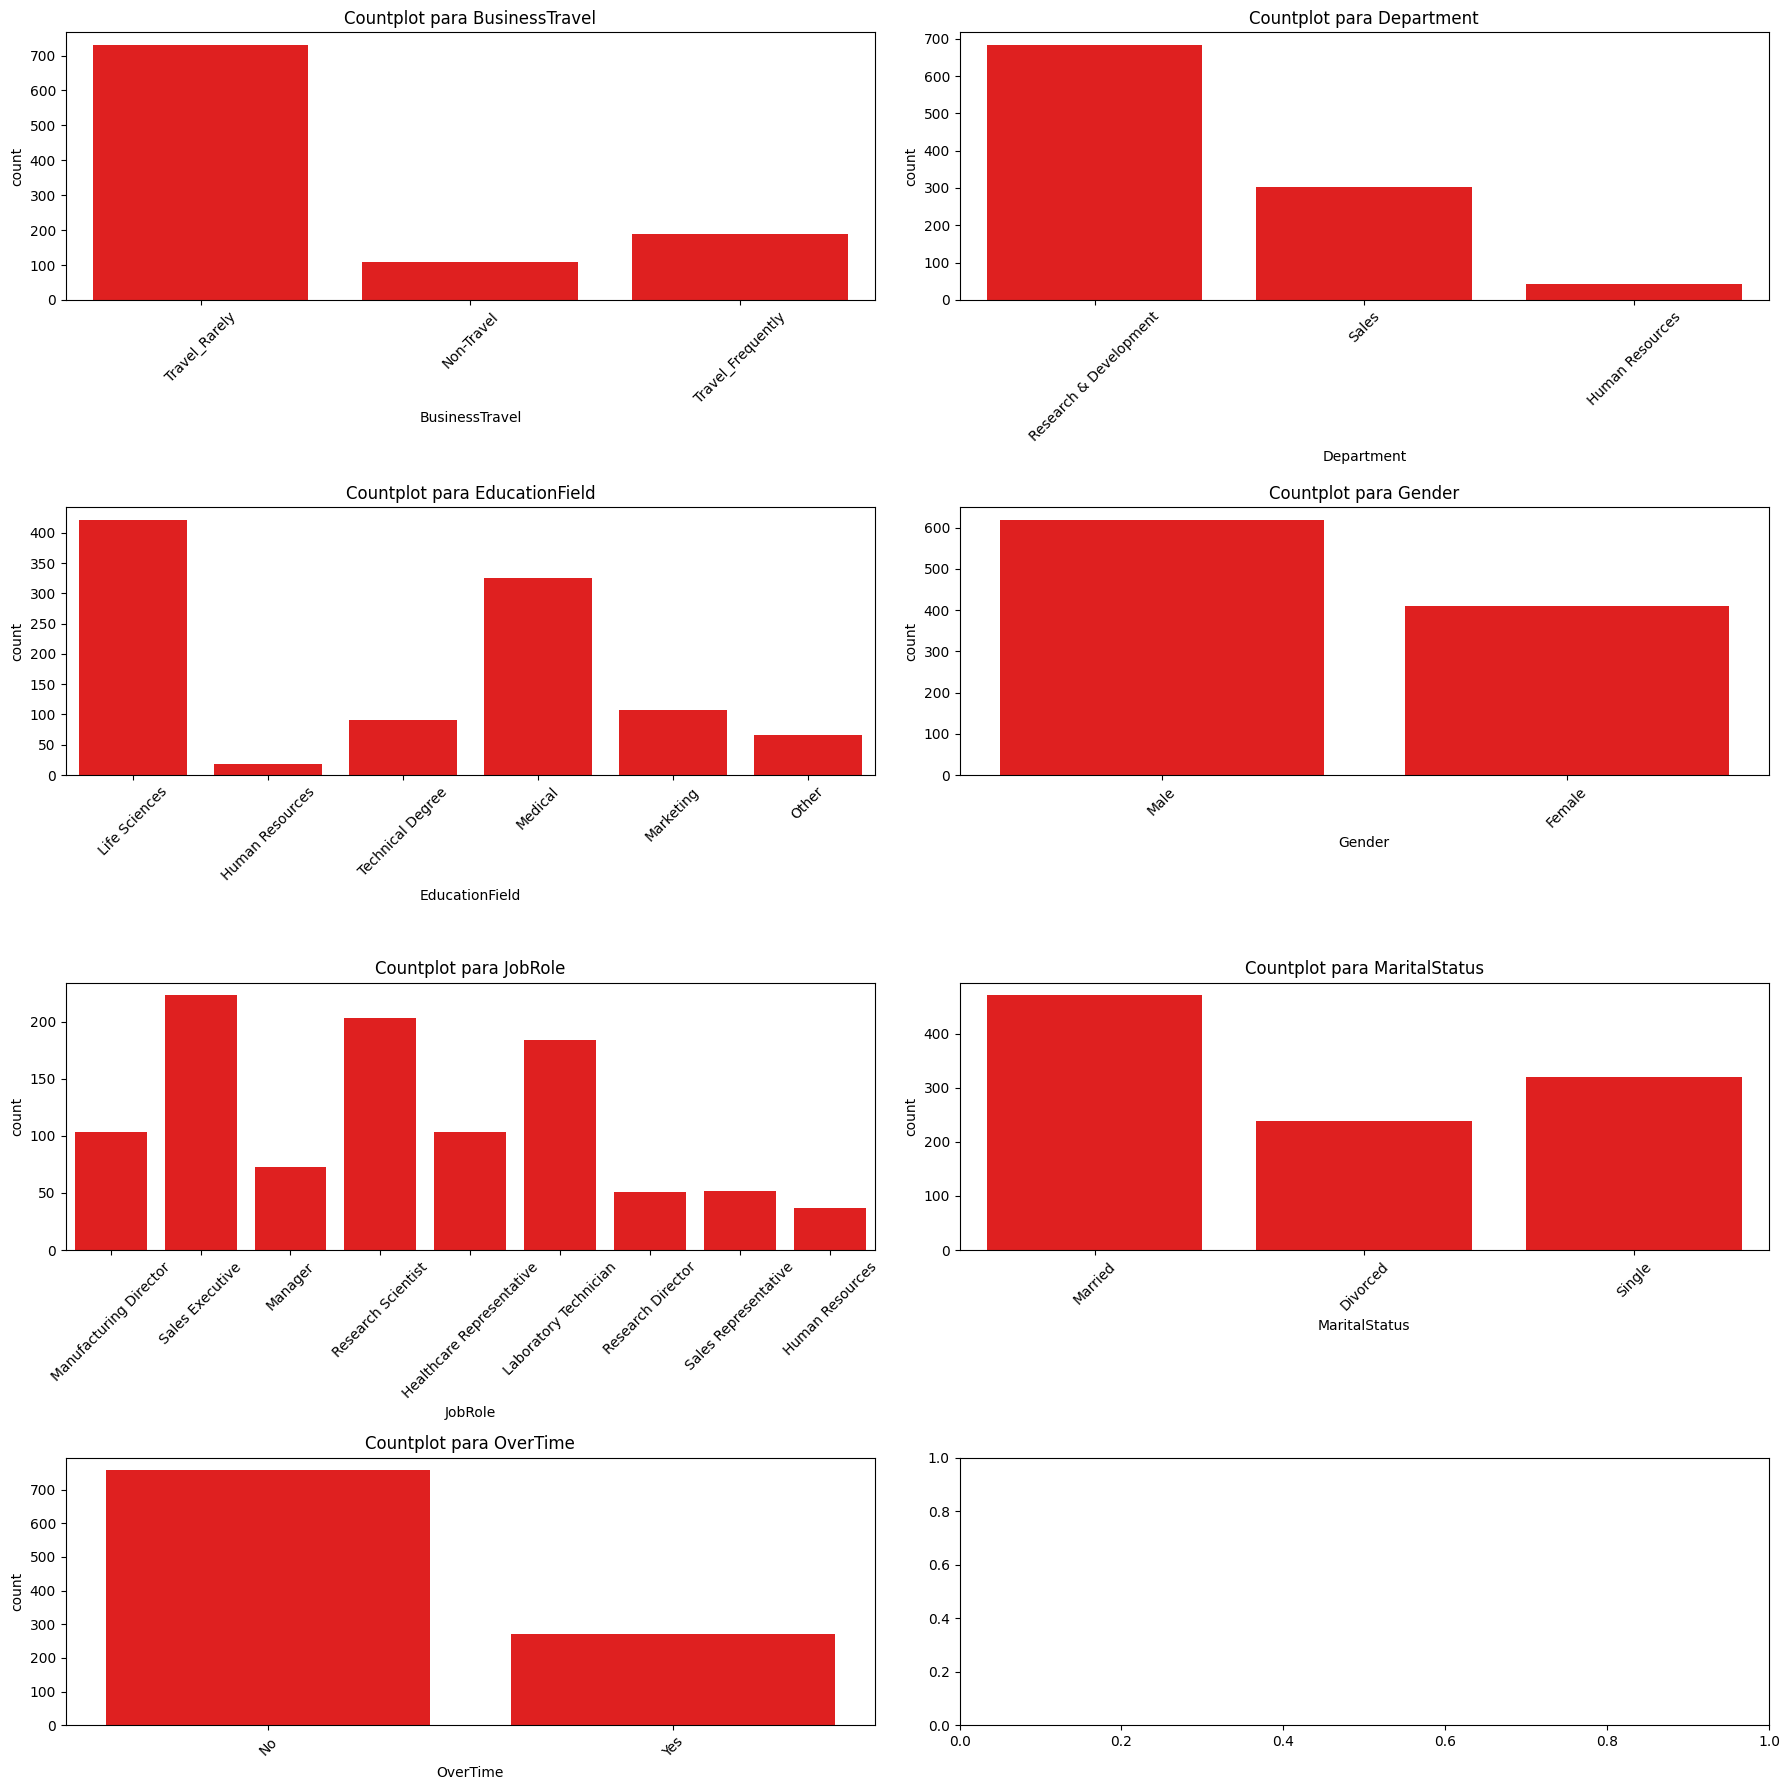

In [74]:
dfobj = Xtrain.select_dtypes(include = 'object')
fig, axes = plt.subplots(4,2 , figsize=(18, 18))
axes = axes.flatten()
for i, columna in enumerate(dfobj.columns):
    sns.countplot(data=dfobj, x=columna, ax=axes[i], color='red')
    axes[i].set_title(f'Countplot para {columna}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Tras realizar un análisis de nuestros datos de entrenamiento, observamos que algunas variables numéricas presentan sesgo, entre ellas: Age, DistanceFromHome, MonthlyIncome, TotalWorkingYears, NumCompaniesWorked, PercentSalaryHike, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion y YearsWithCurrManager. Además, a través de los boxplots identificamos que varias variables contienen valores atípicos, siendo los más destacados: MonthlyIncome, TotalWorkingYears, YearsAtCompany y YearsSinceLastPromotion.

En cuanto a las variables categóricas, identificamos que algunas, como JobRole y EducationField, tienen categorías con una representación significativamente menor en comparación con otras. Por otro lado, en la variable OverTime observamos que la mayoría de los trabajadores no realizan horas extra.
Una vez concluido este análisis, se sugieren las siguientes transformaciones:

Variables numéricas: Aplicar una transformación logarítmica para corregir el sesgo detectado.

Variables ordinales: Utilizar OrdinalEncoder para mantener  el orden lógico de estas variables.

Variables binarias: I Aplicar OneHotEncoder con drop='first' para evitar generar columnas adicionales para las variables binarias.

Variables nominales: Aplicar OneHotEncoder para transformar las categorías en columnas binarias.



# **Ejercicio 8:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**



A) El manejo de los datos faltantes es crucial para evitar que nuestro modelo se vea afectado, ya que esto podría causar errores o sesgos. Por esta razón, se toma la siguiente selección:

* Variables numéricas: Se decide imputar con la mediana debido a que es más
robusta frente a valores atípicos.
* Variables categóricas: Se opta por imputar con el valor más frecuente, ya que asegura que la variable conserve una categoría válida y consistente con la mayoría de los datos.

B)Transformación de variables numéricas:
Se utiliza una transformación logarítmica debido a que se observó que algunas variables tienen distribuciones sesgadas. Esta transformación ayuda a normalizar los datos y mejorar la estabilidad de los algoritmos de aprendizaje automático.

C)Transformación de variables ordinales:
Las variables ordinales tienen un orden lógico en sus categorías. El uso de OrdinalEncoder asegura que este orden se preserve asignando valores numéricos crecientes a las categorías, lo que permite al modelo captar correctamente la relación jerárquica entre las mismas.

D)Transformación de variables binarias:
Se elige utilizar OneHotEncoder (con drop='first') para transformar las variables binarias a un formato numérico requerido por la mayoría de los algoritmos. Esto simplifica la interpretación y evita problemas de multicolinealidad al eliminar la redundancia.

E) Transformación de variables nominales:
Las variables nominales no tienen un orden intrínseco entre sus categorías. Por ello, se utiliza OneHotEncoder, que genera columnas binarias para cada categoría, permitiendo al modelo evaluar de manera separada el impacto de cada una en la predicción.


In [75]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++



# NUMÉRICAS:
numericas_pipeline = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='median')),
                                      ('log_transform', FunctionTransformer(np.log1p, validate=True)),
                                      ('scaler', StandardScaler())
                                    ]
                              )


numericas_pipeline_nombres = ['NumCompaniesWorked', 'TrainingTimesLastYear', 'Age', 'DailyRate', 'DistanceFromHome',
                              'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears',
                              'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# ORDINALES:
catOrd_pipeline = Pipeline( steps=[
                                   ('imputer', SimpleImputer(strategy='most_frequent')),
                                   ('ordinal', OrdinalEncoder())
                                  ]
                          )
catOrd_pipeline_nombres = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                           'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
                          'StockOptionLevel', 'WorkLifeBalance']

# BINARIAS:
catBin_pipeline = Pipeline(steps=[
                                  ('imputer', SimpleImputer(strategy='most_frequent')),
                                  ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False, drop='first')) ])
catBin_pipeline_nombres = ['Gender', 'OverTime']

# NOMINALES:
catNom_pipeline = Pipeline( steps=[
                                    ('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False, drop='first'))
                                  ]
                          )
catNom_pipeline_nombres = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']



columnasTransformer = ColumnTransformer( transformers = [('numerica', numericas_pipeline, numericas_pipeline_nombres),
                                                         ('ordinal',catOrd_pipeline,catOrd_pipeline_nombres),
                                                         ('binaria',catBin_pipeline,catBin_pipeline_nombres),
                                                         ('Nominal',catNom_pipeline,catNom_pipeline_nombres)],
                                        remainder='passthrough' )

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 9:**

#### **Reagrupa los conjuntos de entrenamiento y validación en un solo DataFrame.**

#### **A estos nuevos DataFrame llamarlos Xtv y ytv.**

In [76]:
from re import X
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

Xtv = pd.concat([Xtrain, Xval])
ytv = pd.concat([ytrainT, yvalT])


# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

print(Xtv.shape)
print(ytv.shape)

(1249, 30)
(1249, 1)


# **Ejercicio 10:**

#### **Busca los mejores hiperparámetros.**

>> LR 0.856 (0.021)
>> LASSO 0.865 (0.020)
>> RIDGE 0.865 (0.022)
>> EN 0.866 (0.022)
>> kNN 0.846 (0.011)


C:\Users\Oscar\AppData\Local\Temp\ipykernel_25836\1549819244.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.


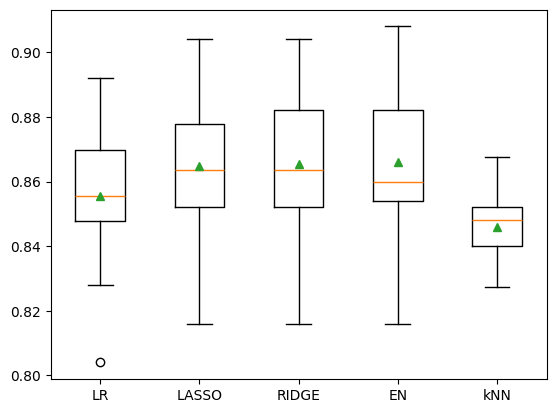

In [77]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Regresión Logística sin regularización:
  modelos.append(LogisticRegression(penalty=None,  # Este valor de "penalty" no se debe de cambiar, ya que define el modelo sin regularización.
                                    max_iter=2000, class_weight={0: 1, 1: 2},  # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LR')


  # Lasso - Regresión Logística con regularización L1:
  modelos.append(LogisticRegression(penalty='l1',
                                    solver='liblinear',C=0.9,max_iter=2000,class_weight={0: 1, 1: 2},     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LASSO')


  # Ridge - Regresión Logística con regularización L2:
  modelos.append(LogisticRegression(penalty='l2',
                                    solver='lbfgs',C=0.9,max_iter=2000, class_weight={0: 1, 1: 2},    # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('RIDGE')


  # Elastic_Net - - Regresión Logística con regularización L1 y L2:
  modelos.append(LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5,C=0.9,max_iter=10000,class_weight={0: 1, 1: 2}, # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('EN')



  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski',  p=2 )) # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
  nombres.append('kNN')

  return modelos, nombres

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# Entrenamos los modelos:

modelos, nombres = mis_modelos()  # accesando los modelos.
resultados = list()    # para guardar los resultados en esta lista.

# Iterando y entrenando sobre cada modelo:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Transformaciones y modelo en un Pipeline.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # entrenando y generando los resultados.

  resultados.append(scores)    # guardando los resultados en la lista.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # desplegando los promedios de cada modelo.


plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.
plt.show()

# **Ejercicio 11:**

#### **Utilizando el mejor modelo y los datos Xtv, ytv, realiza una búsqueda de malla para encontrar los mejores hiperparámetros. Verifica que el modelo no esté subentrenado o sobreentrenado.**



In [78]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++


mejor_modelo = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.5,C=0.9, max_iter=2000, random_state=1)

param_grid = {
               'C': [0.01, 0.1,0.5, 1.0, 10.0, 100.0],
               'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
             }
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

grid_result = GridSearchCV(estimator=mejor_modelo,param_grid=param_grid,scoring='accuracy',cv=cv,n_jobs=-1,return_train_score=True )

Xx = columnasTransformer.fit_transform(Xtv)

grid_result.fit(Xx, np.ravel(ytv))
# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++



print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print('Promedios Train mean(std): %.4f(%.4f)' % (np.nanmean(grid_result.cv_results_['mean_train_score']),
                                                 np.nanmean(grid_result.cv_results_['std_train_score'])))
print('Promedios Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(),
                                               grid_result.cv_results_['std_test_score'].mean()))


Mejor modelo: 0.889516 usando {'C': 0.5, 'l1_ratio': 0.9}
Promedios Train mean(std): 0.8898(0.0036)
Promedios Val mean(std): 0.8759(0.0109)


# **Ejercicio 12:**

#### **Con los mejores valores de hiperparámetros del mejor modelo encontrado, obtener:**

*   #### **a) Matriz de Confusión.**
*   #### **b) Análisis de Importancia de Factores.**
*   #### **c) Reporte de métricas.**

In [79]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
# Incluye todas las celdas que consideres adecuado para responder
# estos tres incisos del ejercicio.

XtrainT = columnasTransformer.fit_transform(Xtrain)
XvalT = columnasTransformer.transform(Xval)

m_modelo = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.9, C=0.5, max_iter=1000, random_state=1,   class_weight={0: 1, 1: 2})
m_resultado = m_modelo.fit(XtrainT, np.ravel(ytrainT))

accuracy = m_resultado.score(XvalT, np.ravel(yvalT))

print("accuracy:", round(accuracy,4))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

accuracy: 0.8909


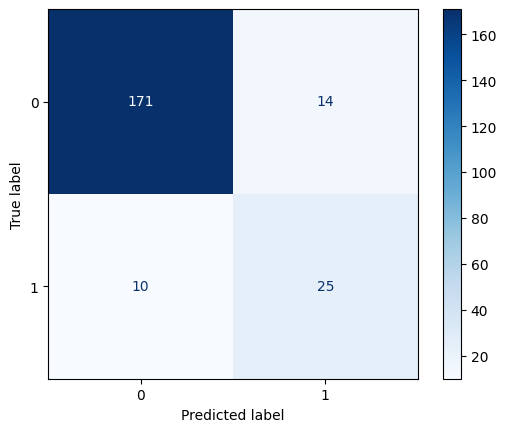

In [80]:
ConfusionMatrixDisplay.from_estimator(m_resultado, XvalT, np.ravel(yvalT),cmap='Blues')
plt.show()

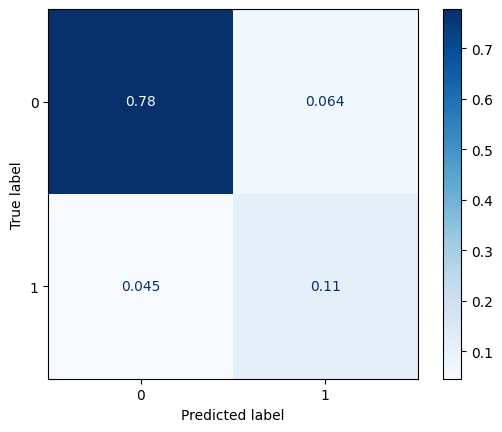

In [81]:
ConfusionMatrixDisplay.from_estimator(m_resultado, XvalT, np.ravel(yvalT), normalize='all',cmap='Blues')
plt.show()

In [82]:
m_resultado.coef_

array([[ 4.79825815e-01, -2.38109558e-01, -2.13911574e-01,
        -8.62953409e-02,  3.30101541e-01,  9.26910042e-02,
        -4.40190303e-01,  1.28922802e-01, -8.94597075e-02,
        -2.36790984e-01,  2.89218726e-01, -3.64263847e-01,
         3.73001677e-01, -2.88856184e-01,  9.83126678e-02,
        -3.98056893e-01, -5.03520687e-01,  0.00000000e+00,
        -3.99116660e-01,  0.00000000e+00, -2.23174505e-01,
        -8.42712511e-02, -3.62768643e-01,  4.92084954e-01,
         1.53616192e+00,  1.32139562e+00,  4.73665819e-01,
        -6.85322156e-01,  0.00000000e+00, -3.44301524e-01,
         7.14139536e-02, -1.50891752e-03,  0.00000000e+00,
         6.61185116e-01,  1.21201629e-01,  4.80514859e-01,
        -1.06304334e-02,  0.00000000e+00, -7.42787174e-01,
        -1.64834948e-01,  0.00000000e+00,  2.84090559e-01,
         3.96435280e-01,  1.25788282e+00]])

In [83]:
feature_names = []

for name, transformer, columns in columnasTransformer.transformers_:
    if transformer != 'drop' and transformer != 'passthrough':
        try:
            feature_names.extend(transformer.get_feature_names_out(columns))
        except AttributeError:
            feature_names.extend(columns)
    elif transformer == 'passthrough':
        feature_names.extend(columns)

coeficientes = pd.DataFrame(data=m_resultado.coef_.flatten(),index=feature_names,columns=['Importancia'])

# Ordenar por valor absoluto de los coeficientes
coeficientes = coeficientes.reindex(coeficientes.Importancia.abs().sort_values(ascending=False).index)

# Mostrar los coeficientes ordenados
print(coeficientes)


                                   Importancia
OverTime_Yes                          1.536162
BusinessTravel_Travel_Frequently      1.321396
MaritalStatus_Single                  1.257883
JobRole_Research Director            -0.742787
Department_Research & Development    -0.685322
EducationField_Technical Degree       0.661185
JobInvolvement                       -0.503521
Gender_Male                           0.492085
JobRole_Laboratory Technician         0.480515
NumCompaniesWorked                    0.479826
BusinessTravel_Travel_Rarely          0.473666
MonthlyIncome                        -0.440190
JobSatisfaction                      -0.399117
EnvironmentSatisfaction              -0.398057
MaritalStatus_Married                 0.396435
YearsSinceLastPromotion               0.373002
YearsInCurrentRole                   -0.364264
WorkLifeBalance                      -0.362769
EducationField_Life Sciences         -0.344302
DistanceFromHome                      0.330102
YearsAtCompan

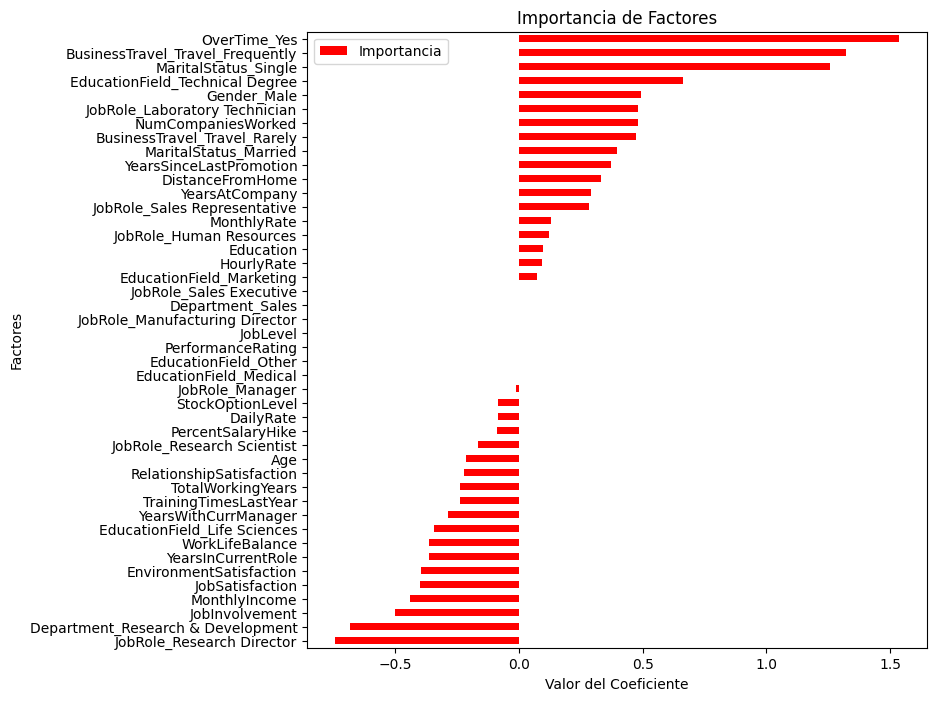

In [84]:
coeficientes.sort_values('Importancia', ascending=True).plot(kind='barh',figsize=(8, 8),color='red')
plt.title('Importancia de Factores')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Factores')
plt.show()


En la gráfica anterior podemos observar los factores que mejor explican la variabilidad de la variable de salida. Podemos notar que los factores con un coeficiente positivo, como "OverTime_Yes" y "BusinessTravel_Travel_Frequently", son factores que afectan directamente la probabilidad de pertenecer a la clase positiva (Abandonar la empresa). Por otro lado, los factores con coeficientes negativos, como "JobInvolvement" y "MonthlyIncome", tienen un impacto mayor en la probabilidad de pertenecer a la clase negativa (No abandonar la empresa).


In [85]:
Xval_transformed = columnasTransformer.transform(Xval)
y_val_pred = m_modelo.predict(Xval_transformed)
reporte_val = classification_report(yvalT, y_val_pred, target_names=["No abandonan", "Abandonan"])
print("Reporte en validación:\n", reporte_val)

Reporte en validación:
               precision    recall  f1-score   support

No abandonan       0.94      0.92      0.93       185
   Abandonan       0.64      0.71      0.68        35

    accuracy                           0.89       220
   macro avg       0.79      0.82      0.81       220
weighted avg       0.90      0.89      0.89       220



# **Ejercicio 13**

#### **Obtener el desempeño final del modelo (accuracy) con el conjunto de prueba (test).**

In [86]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
XtestT = columnasTransformer.transform(Xtest)
y_pred_test = m_modelo.predict(XtestT)
accuracy = accuracy_score(ytestT, y_pred_test)

print("El accuracy final del modelo en el conjunto de prueba es:",round(accuracy,4))

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

El accuracy final del modelo en el conjunto de prueba es: 0.8597


# **Ejercicio 14**

#### **Incluye tus conclusiones finales de la actividad.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++

En este análisis, se aplicaron diversas técnicas de preprocesamiento, como la imputación de datos faltantes, transformaciones logarítmicas para corregir sesgos en las variables numéricas y codificación adecuada de variables categóricas. Esto permitió garantizar la calidad de los datos para entrenar modelos de clasificación. Variables como OverTime_Yes y BusinessTravel_Travel_Frequently destacaron por su influencia positiva en la predicción de abandono, mientras que JobInvolvement y MonthlyIncome fueron determinantes para reducir la probabilidad de abandono. Estas observaciones ayudaron a comprender mejor los factores que afectan el comportamiento de los empleados.

El modelo basado en ElasticNet se destacó con un accuracy del 86.6% en validación cruzada y 85.9% en el conjunto de prueba. Al ajustar el balance de clases mediante class_weight={0: 1, 1: 2}, se incrementó significativamente el recall de la clase positiva (empleados que abandonan), alcanzando un 71%. Este enfoque permitió priorizar la detección de empleados en riesgo, manteniendo un buen equilibrio entre precisión y recall, lo que hace que este modelo sea adecuado para implementar estrategias que mejoren la retención laboral.

#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# >> **Fin de la Actividad de la Semana 3** <<